In [1]:
import math

import numpy as np
import matplotlib.pyplot as plt

import force_module as force


N:  1000
   g:  1.3
   p:  1.0
   nRec2Out:  1000
   alpha:  1.000
   nsecs_train:  1500
   learn_every:  1



In [2]:
def get_inp_target_1(simtime, dt, voltage, amp, freq, noise_scale=0.2,
                     mode='train'):
    """For epoch 0: before BC. should show baseline actiivty."""
    inp = np.zeros(simtime.shape)

    # tail activity: baseline.
    baseline = 0
    tail_activity = (force.get_ft(simtime, amp, freq) + baseline +
                     np.random.randn(simtime.shape[0]) * noise_scale)

    return inp, tail_activity


def get_inp_target_2(simtime, dt, voltage, amp, freq, noise_scale=0.2,
                     mode='train'):
    """For epoch 1: should increase and the ndecrease below baseline activity."""
    shock = np.zeros([int(1 / dt)])
    shock[0] = voltage
    shock[1] = voltage

    inp_shock = np.repeat(shock, int(simtime.shape[0] / shock.shape[0]))

    if mode != 'train':
        return inp_shock

    # tail activity: increase for first 250 sec, then decrease. Should decrease
    # below baseline. Since the original data cannot be acquired,
    trend = np.append(np.arange(0, 2 - 0.002, 0.002),
                      np.arange(2, -3, -0.001))
    tail_activity = (force.get_ft(simtime, amp, freq) + trend +
                     np.random.randn(simtime.shape[0]) * noise_scale)

    return inp_shock, tail_activity

def get_inp_target_3(simtime, dt, voltage, amp, freq, noise_scale=0.2,
                     mode='train'):
    """For epoch 2: should increase and the ndecrease below baseline activity."""
    shock = np.zeros([int(1 / dt)])
    shock[0] = voltage
    shock[1] = voltage

    inp_shock = np.repeat(shock, int(simtime.shape[0] / shock.shape[0]))

    if mode != 'train':
        return inp_shock

    # tail activity: increase for first 250 sec, then decrease. Should decrease
    # below baseline. Since the original data cannot be acquired,
    pc_state = -3
    tail_activity = (force.get_ft(simtime, amp, freq) + pc_state +
                     np.random.randn(simtime.shape[0]) * noise_scale)

    return inp_shock, tail_activity



In [3]:

import importlib
importlib.reload(force)
hp = force.HP()
simtime_train = np.arange(0, hp.nsecs_train, hp.dt)
simtime_test = np.arange(hp.nsecs_train, hp.nsecs_train + hp.nsecs_test,
                         hp.dt)

network = force.all2all(hp.N, hp.p, hp.g, hp.alpha, hp.learn_every,
                        hp.nRec2Out, simtime_train.shape[0], num_inputs=1,
                        num_outputs=1)

epochs = []


N:  1000
   g:  1.3
   p:  1.0
   nRec2Out:  1000
   alpha:  1.000
   nsecs_train:  1500
   learn_every:  1



## Epoch 1: Baseline Activity

time:  0.0
time:  187.5
time:  375.0
time:  562.5
time:  750.0
time:  937.5
time:  1125.0
time:  1312.5
Training MAE:  0.003
Now testing... please wait.


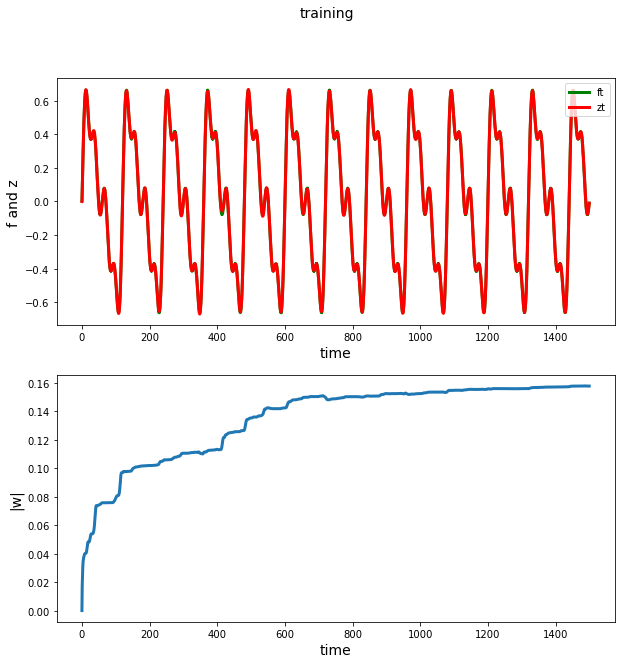

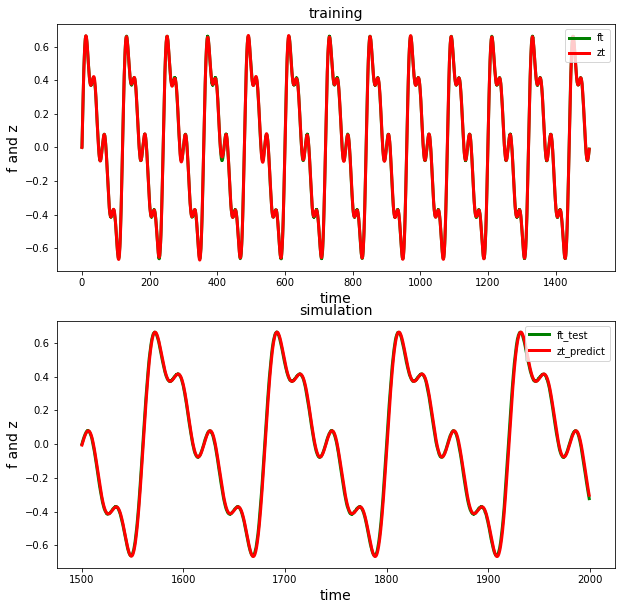

In [5]:
inp_train, ft = get_inp_target_1(simtime_train, hp.dt, 5, hp.amp, hp.freq, noise_scale=0.001)
inp_test, ft_test = get_inp_target_1(simtime_test, hp.dt, 5, hp.amp, hp.freq, mode='test', noise_scale=0.001)

x, rate, zt = network.train(simtime_train, ft, hp.nsecs_train, hp.dt, hp.tau, inp_train)
zt_predict = network.test(simtime_test, x, rate, hp.dt, hp.tau, inp_test)

epochs.append(network.M)

# Plotting
fig, axs = plt.subplots(2, figsize=(10, 10))
line1, = axs[0].plot(simtime_train, ft, linewidth=hp.linewidth, color='green')
axs[0].set_title('training', fontsize=hp.fontsize)
axs[0].set_xlabel('time', fontsize=hp.fontsize)
axs[0].set_ylabel('f and z', fontsize=hp.fontsize)
line2, = axs[0].plot(simtime_train, zt, linewidth=hp.linewidth, color='red')
axs[0].legend((line1, line2), ('ft', 'zt'), loc='upper right')

axs[1].set_title('simulation', fontsize=hp.fontsize)
axs[1].set_xlabel('time', fontsize=hp.fontsize)
axs[1].set_ylabel('f and z', fontsize=hp.fontsize)
line3, = axs[1].plot(
    simtime_test, ft_test, linewidth=hp.linewidth, color='green')
line4, = axs[1].plot(
    simtime_test, zt_predict, linewidth=hp.linewidth, color='red')
axs[1].legend((line3, line4), ('ft_test','zt_predict'), loc='upper right')
plt.show()



## Epoch 2: During BC

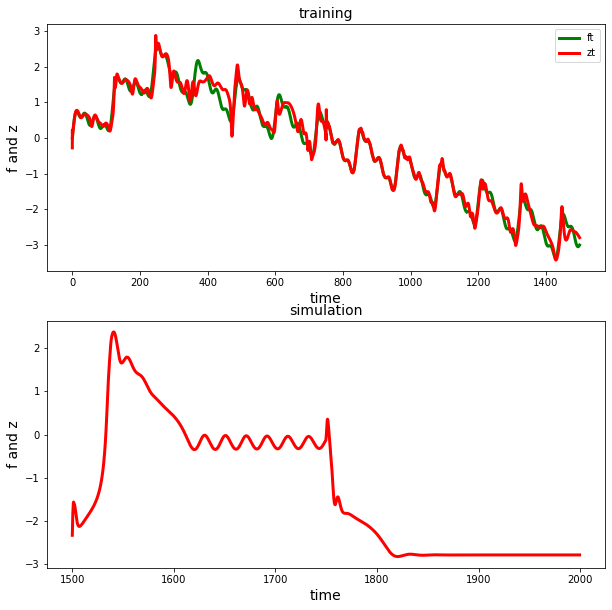

In [8]:
inp_train, ft = get_inp_target_2(simtime_train, hp.dt, 5, hp.amp, hp.freq, noise_scale=0.001)
inp_test = get_inp_target_2(simtime_test, hp.dt, 5, hp.amp, hp.freq, mode='test', noise_scale=0.001)

x, rate, zt = network.train(simtime_train, ft, hp.nsecs_train, hp.dt, hp.tau, inp_train)
zt_predict = network.test(simtime_test, x, rate, hp.dt, hp.tau, inp_test)

epochs.append(network.M)

# Plotting 
fig, axs = plt.subplots(2, figsize=(10, 10))
line1, = axs[0].plot(simtime_train, ft, linewidth=hp.linewidth, color='green')
axs[0].set_title('training', fontsize=hp.fontsize)
axs[0].set_xlabel('time', fontsize=hp.fontsize)
axs[0].set_ylabel('f and z', fontsize=hp.fontsize)
line2, = axs[0].plot(simtime_train, zt, linewidth=hp.linewidth, color='red')
axs[0].legend((line1, line2), ('ft', 'zt'), loc='upper right')

axs[1].set_title('simulation', fontsize=hp.fontsize)
axs[1].set_xlabel('time', fontsize=hp.fontsize)
axs[1].set_ylabel('f and z', fontsize=hp.fontsize)
line3, = axs[1].plot(
    simtime_test, zt_predict, linewidth=hp.linewidth, color='red')
plt.show()



## Epoch 3: PC state

time:  0.0
time:  187.5
time:  375.0
time:  562.5
time:  750.0
time:  937.5
time:  1125.0
time:  1312.5
Training MAE:  0.272
Now testing... please wait.


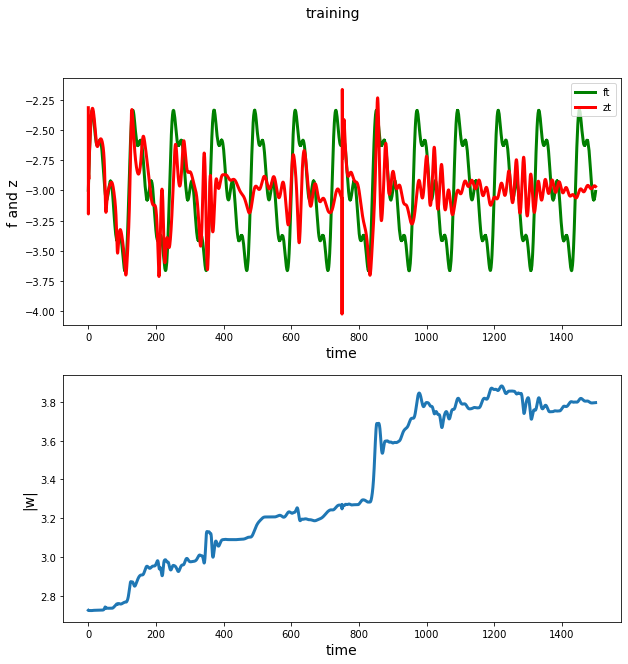

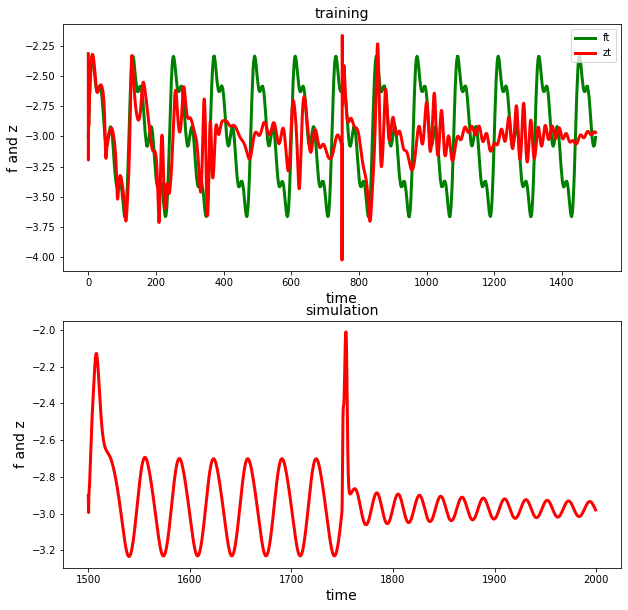

In [9]:
inp_train, ft = get_inp_target_3(simtime_train, hp.dt, 5, hp.amp, hp.freq, noise_scale=0.001)
inp_test = get_inp_target_3(simtime_test, hp.dt, 5, hp.amp, hp.freq, mode='test', noise_scale=0.001)

x, rate, zt = network.train(simtime_train, ft, hp.nsecs_train, hp.dt, hp.tau, inp_train)
zt_predict = network.test(simtime_test, x, rate, hp.dt, hp.tau, inp_test)

epochs.append(network.M)

# Plotting 
fig, axs = plt.subplots(2, figsize=(10, 10))
line1, = axs[0].plot(simtime_train, ft, linewidth=hp.linewidth, color='green')
axs[0].set_title('training', fontsize=hp.fontsize)
axs[0].set_xlabel('time', fontsize=hp.fontsize)
axs[0].set_ylabel('f and z', fontsize=hp.fontsize)
line2, = axs[0].plot(simtime_train, zt, linewidth=hp.linewidth, color='red')
axs[0].legend((line1, line2), ('ft', 'zt'), loc='upper right')

axs[1].set_title('simulation', fontsize=hp.fontsize)
axs[1].set_xlabel('time', fontsize=hp.fontsize)
axs[1].set_ylabel('f and z', fontsize=hp.fontsize)
line3, = axs[1].plot(
    simtime_test, zt_predict, linewidth=hp.linewidth, color='red')
plt.show()

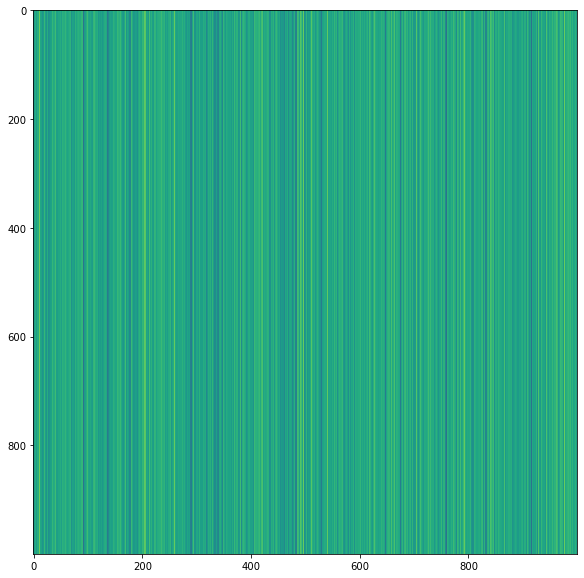

In [16]:
fig = plt.figure(figsize=(10, 10))
plt.imshow(epochs[0]-epochs[2])